In [10]:
# Importing packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import imutils

In [11]:
# Defining the no. of clusters for the KMeans algorithm.
clusters = 7

In [12]:
# Reading input image.
img = cv2.imread('pic.jpg')

# Keeping a copy of it for future use.
org_img = img.copy()

# Printing its shape.
print('Orginal image shape --> ',img.shape)

Orginal image shape -->  (168, 300, 3)


In [13]:
# Resizing our image to get results fast.
img = imutils.resize(img,height=200)

# Printing resized image shape.
print('After resizing image shape --> ',img.shape)

After resizing image shape -->  (200, 357, 3)


In [14]:
# Flattening the image. 
flat_img = np.reshape(img,(-1,3))

# Check the shape of the flattened image 
print('After Flattening shape --> ',flat_img.shape)

After Flattening shape -->  (71400, 3)


In [15]:
# Making a KMeans Clustering object with n_clusters
kmeans = KMeans(n_clusters=clusters,random_state=0)

# Fit our image in Kmeans Clustering Algorithm
kmeans.fit(flat_img)

KMeans(n_clusters=7, random_state=0)

In [16]:
# Extracting cluster centers
dominant_colors = np.array(kmeans.cluster_centers_,dtype='uint')

In [17]:
# calculating the dominance of each dominant color.
percentages = (np.unique(kmeans.labels_,return_counts=True)[1])/flat_img.shape[0]

# zipping percentages and colors together
p_and_c = zip(percentages,dominant_colors)

# sort this zip object in descending order
p_and_c = sorted(p_and_c,reverse=True)


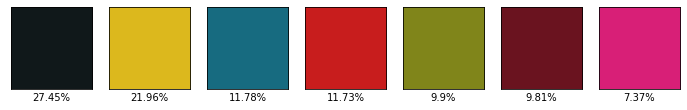

In [18]:
# plotting blocks of dominant colors.
block = np.ones((50,50,3),dtype='uint')
plt.figure(figsize=(12,8))
for i in range(clusters):
    plt.subplot(1,clusters,i+1)
    block[:] = p_and_c[i][1][::-1] # we have done this to convert bgr(opencv) to rgb(matplotlib) 
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(round(p_and_c[i][0]*100,2))+'%')

([], <a list of 0 Text major ticklabel objects>)

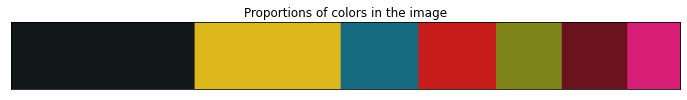

In [19]:
# We are plotting the following bar.
bar = np.ones((50,500,3),dtype='uint')
plt.figure(figsize=(12,8))
plt.title('Proportions of colors in the image')
start = 0
i = 1
for p,c in p_and_c:
    end = start+int(p*bar.shape[1])
    if i==clusters:
        bar[:,start:] = c[::-1]
    else:
        bar[:,start:end] = c[::-1]
    start = end
    i+=1
plt.imshow(bar)
plt.xticks([])
plt.yticks([])